In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fft as fft
from scipy import signal

In [2]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    
def generatecenter(s_dim, N, radius_pixels):
    mSample = np.zeros((s_dim,s_dim))
    m_dim = s_dim - 2*radius_pixels              #Possible center points matrix dim
    m_prepad = np.ones((m_dim,m_dim))

    #------Padding-----#
    pad_length = radius_pixels  # + 5 for insurance
    m = np.pad(m_prepad, pad_length, pad_with, padder=0) #mask matrix
    
    #---where we start picking points, loop over number of particles N---#
    count = 0
    for x in range(0,N):
        #Create a mask of all available center points
        indices = [(i,j) for i in range(len(m)) for j in range(len(m[i])) if m[i][j] != 0] # generate mask grid
        
        #Out of all available center points, pick a random one
        p = np.random.randint(0,len(indices))
        p1 = indices[p]
        count += 1
        print(count)
        
        #Loop for updating mask and sample matrix with every generated particle
        for i in range(s_dim):
            for j in range(s_dim):
                if ((i-p1[0])*(i-p1[0]) + (j-p1[1])*(j-p1[1])) <= (radius_pixels*2 )**2:
                    #masking the circle
                    m[i][j] = 0                                                    
                if ((i-p1[0])*(i-p1[0]) + (j-p1[1])*(j-p1[1])) <= (radius_pixels-2)**2:  # - 2 to fix some issue with circle generation
                    #creating the circle on the sample matrix
                    mSample[i][j] = 1                                              
                
    return m, mSample

In [133]:
m_dim = s_dim - 2*radius_pixels
m_prepad = np.ones((m_dim,m_dim))

#------Padding-----#
pad_length = radius_pixels  # + 5 for insurance
m = np.pad(m_prepad, pad_length, pad_with, padder=0) #mask matrix
#plt.imshow(m)
len(m), s_dim, m_dim

(1080, 1080, 1054)

# Defining Sample

In [134]:
#-------------Sample--------------#
       
s_dim = 1080                                     # dimension of the sample matrix
sample_pixel_size = 2 * 10**(-9)                       #m
a = 2                                           #nm    this is the smallest unit length for our detector
aa = 20 #AA

N = 250                                          # number of particles
radius = 26                                    # radius of particle in nm
radius_meters = radius * 10**(-9)                   # radius in meters
radius_pixels = int(radius*10**(-9) / sample_pixel_size)    # radius in pixels

mSample = np.zeros((s_dim,s_dim))               # generating sample matrix
L = 7.8                                           # sample-detector distance in meters

#constants
c = 2.99792458 * 10**8 
wavelength = 1.5 * 10**(-10)                    #m
frequency = c / wavelength

In [28]:
radius_pixels

13

In [33]:
#------Padding-----#
#pad_length = 502 - s_dim   #602 for 1024 dim
#mSample_pad = np.pad(mSample, pad_length, pad_with, padder=0)
#dim = len(mSample_pad)

#print('Dimension of padded sample is now:', len(mSample_pad))

In [135]:
#---------Defining image extents---------# 

pixelspace = s_dim/2                                              # in units of pixels
pixel_extent = [-pixelspace, pixelspace, -pixelspace, pixelspace]

realspace = (sample_pixel_size * (s_dim/2) * 10**(9))               # [currently nm]
real_extent = [-realspace, realspace, -realspace, realspace]

recipspace = np.pi/aa                                              # in units of 'a' [currently AA]
recip_extent = [-np.pi/aa, np.pi/aa, -np.pi/aa, np.pi/aa]

In [136]:
#---Creating Sample image---#

points, mSample = generatecenter(s_dim, N, radius_pixels)

#points = [[s_dim/2, s_dim/2]]                        # disk centered in the matrix

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


Radius is: 26 nm
Radius in terms of number of pixels: 13


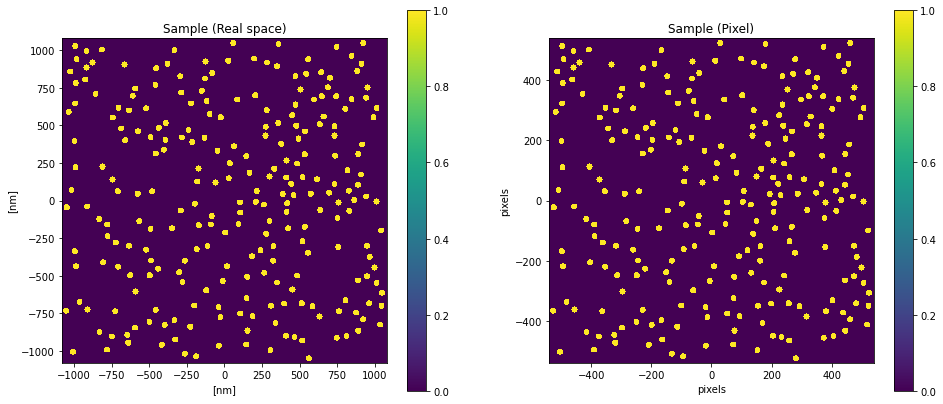

In [121]:
#---Printing---#
fig, (ax1, ax2) = plt.subplots(figsize=(16, 7), ncols=2)

sample1 = ax1.imshow(mSample, extent= real_extent ,interpolation='none', cmap=plt.cm.viridis)
fig.colorbar(sample1, ax=ax1)
ax1.set_xlabel('[nm]')
ax1.set_ylabel('[nm]')
ax1.set_title('Sample (Real space)')

sample2 = ax2.imshow(mSample, extent = pixel_extent, interpolation ='none', cmap=plt.cm.viridis )
fig.colorbar(sample2, ax=ax2)
ax2.set_xlabel('pixels')
ax2.set_ylabel('pixels')
ax2.set_title('Sample (Pixel)')

print('Radius is:',radius, 'nm')
print('Radius in terms of number of pixels:', radius_pixels)

Dimension of padded sample is now: 2080


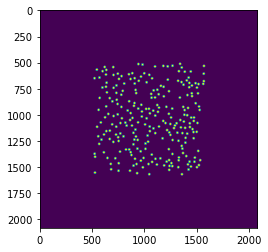

In [263]:
#------Padding-----#
pad_length = 500   #602 for 1024 dim
mSample_pad = np.pad(mSample, pad_length, pad_with, padder=0)
dim = len(mSample_pad)

print('Dimension of padded sample is now:', len(mSample_pad))

plt.imshow(mSample_pad)

# Gaussian Blur

For Gaussian kernel theory: https://pages.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf


In [194]:
# Gaussian function

def gauss_pdf(x, mu, sigma) :
    """Gaussian"""
    return np.exp( -0.5 * (x-mu)**2 / sigma**2)

def Ngauss_pdf(x, N, mu, sigma) :
    """Non-normalized (extended) Gaussian"""
    return N * gauss_pdf(x, mu, sigma)

# Applying Gaussian filter to matrix/image

def gauss_beam(image, dim, sigma):
    index = np.linspace(0, dim, dim)
    mu = dim/2
    gauss = gauss_pdf(index, mu, sigma)
    
    matrix1 = np.ones((dim, dim)) #array in x dimension
    matrix2 = np.ones((dim, dim)) #array in y dimension
    
    for i in range(dim):
        for j in range(dim):
            matrix1[i,j] = gauss[i]*matrix1[i,j]
    
    for j in range(dim):
        for i in range(dim):
            matrix2[i,j] = gauss[j]*matrix2[i,j]
    
    kernel = matrix1 * matrix2  # use the separability characteristic to make a 2D kernel with 2 1D kernels
    
    return kernel * image  # multiplying kernel with image to blur. 

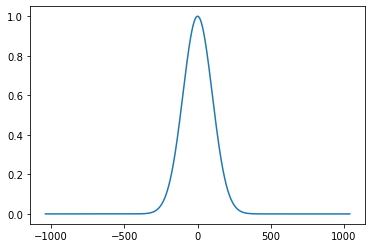

Text(0.5, 1.0, 'Detector')

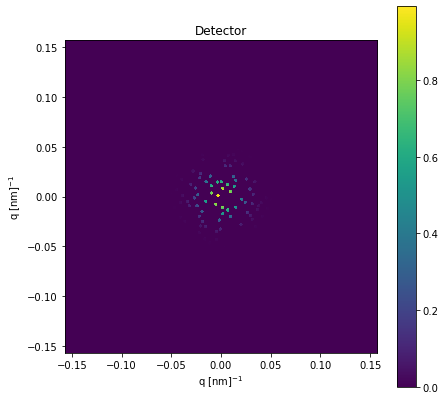

In [264]:
dim = len(mSample[0])
sigma = 100

mSample_gauss = gauss_beam(mSample, dim, sigma)

xx = np.linspace(0, dim, dim)           # x values for gaussian kernel
array2 = np.ones(dim)
kernel = gauss_pdf(xx, dim/2, sigma)    # kernel
gauss_2 = array2 * kernel               # gaussian from multiplying kernel with matrix of ones
xxx = np.linspace(-dim/2, dim/2, dim)   # visual axis
plt.plot(xxx, gauss_2)
plt.show()


#---Printing---#
fig, (ax1) = plt.subplots(figsize=(7, 7), ncols=1)

#q_nm.max() will give max diagonal length in q space, 
#which means we need to inverse pythagoras to find the dimensions of q for the axes. 

detector = ax1.imshow(mSample_gauss,extent= recip_extent, interpolation='none', cmap=plt.cm.viridis)
fig.colorbar(detector, ax=ax1)
ax1.set_xlabel(r'q [nm]$^{-1}$')
ax1.set_ylabel(r'q [nm]$^{-1}$')
ax1.set_title('Detector')

# FFT

Text(0.5, 1.0, '$\\sigma = 50$')

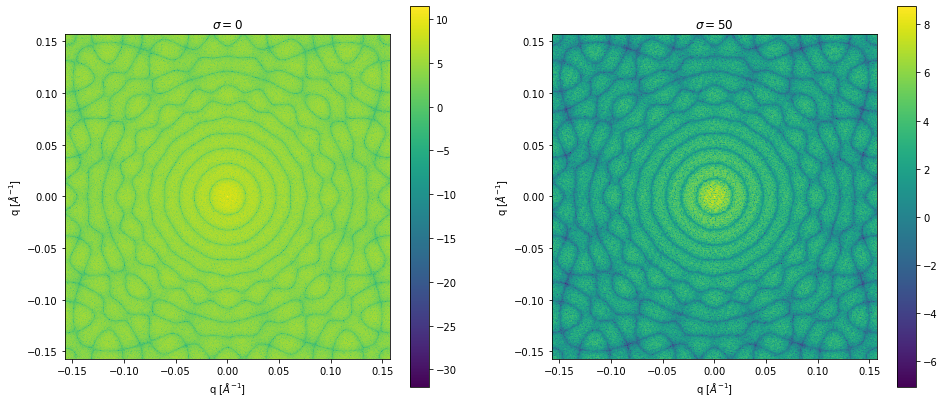

In [265]:
#---set the detector dimension---#
d_dim = dim

s_fourier = np.abs(fft.fftshift(fft.fft2(mSample)))       # full beam

d_fourier = np.abs(fft.fftshift(fft.fft2(mSample_gauss))) # sigma attenuated beam size

#---Printing---#
fig, (ax1, ax2) = plt.subplots(figsize=(16, 7), ncols=2)

sample = ax1.imshow(np.log(s_fourier), extent= recip_extent,interpolation='none', cmap=plt.cm.viridis)
fig.colorbar(sample, ax=ax1)
ax1.set_xlabel(r'q [$\AA^{-1}$]')
ax1.set_ylabel(r'q [$\AA^{-1}$]')
ax1.set_title(r'$\sigma = 0$')

detector = ax2.imshow(np.log(d_fourier), extent= recip_extent ,interpolation='none', cmap=plt.cm.viridis)
fig.colorbar(detector, ax=ax2)
ax2.set_xlabel(r'q [$\AA^{-1}$]')
ax2.set_ylabel(r'q [$\AA^{-1}$]')
ax2.set_title(r'$\sigma = 50$')



# Azimuthal Integration

In [125]:
c = int(d_dim/2)
diag = m.floor(np.sqrt(np.square(c) + np.square(c)))
r_spacing = diag - 5

# Image center
cen_x = c
cen_y = c

# Find radial distances
[X, Y] = np.meshgrid(np.arange(d_dim) - cen_x, np.arange(d_dim) - cen_y)   # creates meshgrid with centering at 0,0
R = np.sqrt(np.square(X) + np.square(Y))   # finds distances from center to every point outwards

# calculate the mean
r  = np.linspace(1, c+1, c)     # radial steps

d = lambda r : d_fourier[(R >= r-.5) & (R < r+.5)].mean() # function with mask of ring R to find mean intensity. 
s = lambda r : s_fourier[(R >= r-.5) & (R < r+.5)].mean()
mean_d = np.vectorize(d)(r)
mean_s = np.vectorize(s)(r)


Text(0, 0.5, 'Intensity')

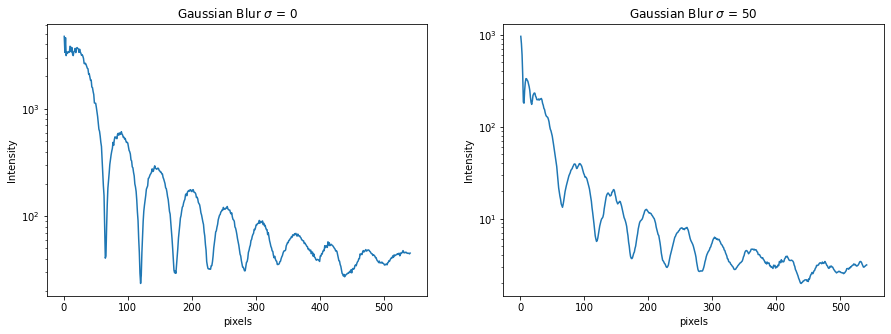

In [126]:
#---Plotting---#
q_scale = np.linspace(0, np.pi/(aa), len(mean_d)) 

fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), ncols=2)
ax1.plot(r, mean_s)
ax1.set_yscale('log')
ax1.set_title(r'Gaussian Blur $\sigma$ = 0')
ax1.set_xlabel('pixels')
ax1.set_ylabel('Intensity')

ax2.plot(r[:],mean_d)
ax2.set_yscale('log')
ax2.set_title(r'Gaussian Blur $\sigma$ = 50')
ax2.set_xlabel(r'pixels')
ax2.set_ylabel('Intensity')


Text(0, 0.5, 'Intensity')

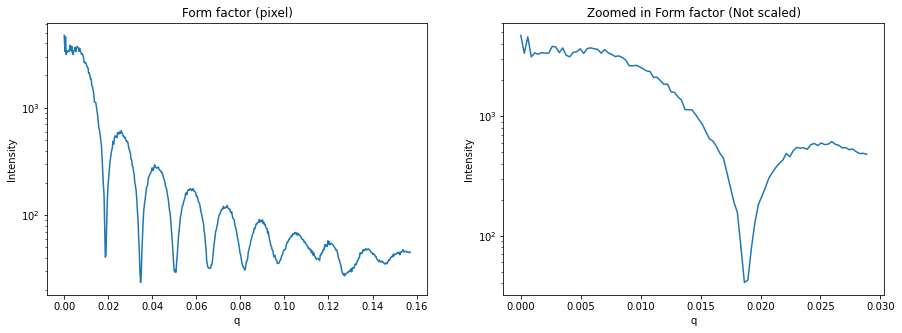

In [129]:
#---mean_d---#
z = 100   

fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), ncols=2)
ax1.plot(q_scale, mean_s)
ax1.set_yscale('log')
ax1.set_title('Form factor (pixel)')
ax1.set_xlabel('q')
ax1.set_ylabel('Intensity')

ax2.plot(q_scale[:z],mean_s[:z])
ax2.set_yscale('log')
ax2.set_title('Zoomed in Form factor (Not scaled)')
ax2.set_xlabel(r'q')
ax2.set_ylabel('Intensity')

In [130]:
first_min = m.ceil(r[np.argmin(mean_d[:z])])          # given in pixel units
print('Plot goes out to',int(r.max()), 'pixels')
print('First minimum occurs at around pixel', q_scale[np.argmin(mean_s[:z])])
print('recovered radius is:', (4.5 / q_scale[np.argmin(mean_s[:z])] ))

Plot goes out to 541 pixels
First minimum occurs at around pixel 0.01865138495637725
recovered radius is: 241.26894654337008


# Final plots

Text(0, 0.5, 'Log I(q)')

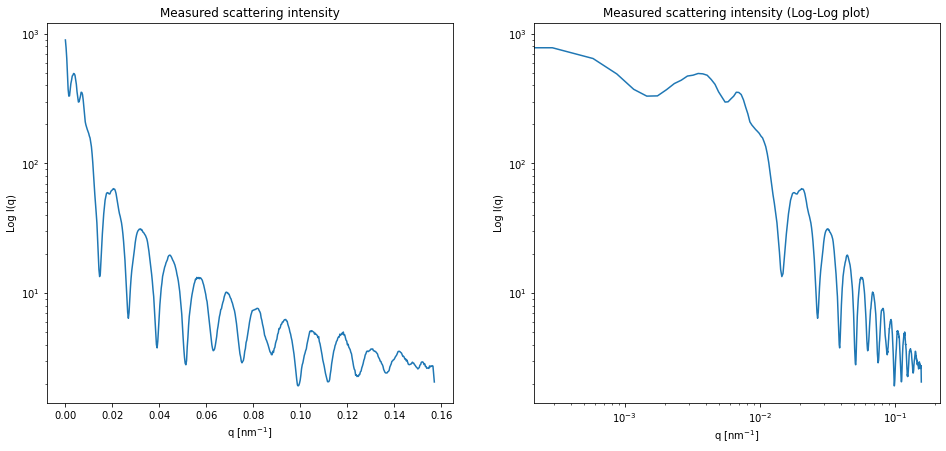

In [73]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 7), ncols=2)

ax1.plot(q_scale, mean_d)
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_title('Measured scattering intensity')
ax1.set_xlabel(r'q [nm$^{-1}$]')
ax1.set_ylabel('Log I(q)')

ax2.plot(q_scale, mean_d)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Measured scattering intensity (Log-Log plot)')
ax2.set_xlabel(r'q [nm$^{-1}$]')
ax2.set_ylabel('Log I(q)')